# Context:
    
The dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, 
each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to 
the set of attributes. The link to the dataset can be found below.

# Dataset:
https://www.kaggle.com/renaldydermawan25/credit-data/version/1

# Some Attribute information:
    
Age (numeric)

Sex (text: male, female)

Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)

Housing (text: own, rent, or free)

Saving accounts (text - little, moderate, quite rich, rich)

Checking account (numeric, in DM - Deutsch Mark)

Credit amount (numeric, in DM)

Duration (numeric, in month)

Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

# Objective:
    
To Guage Feature Importance

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", 50)

In [0]:
#Read input file and understand the data
# "default" is my dependent variable
# importing data
# File location and type
file_location = "/FileStore/tables/credit_data.csv"
file_type = "csv"

# CSV options
infer_schema = "true"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
data = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df = data.select("*").toPandas()


#Load the file from local directory using pd.read_csv which is a special form of read_table
df.head(3)

Out[43]:

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes


In [0]:
df.shape

Out[44]: (1000, 21)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 default 1000 non-null int32 
 1 account_check_status 1000 non-null object
 2 duration_in_month 1000 non-null int32 
 3 credit_history 1000 non-null object
 4 purpose 1000 non-null object
 5 credit_amount 1000 non-null int32 
 6 savings 1000 non-null object
 7 present_emp_since 1000 non-null object
 8 installment_as_income_perc 1000 non-null int32 
 9 personal_status_sex 1000 non-null object
 10 other_debtors 1000 non-null object
 11 present_res_since 1000 non-null int32 
 12 property 1000 non-null object
 13 age 1000 non-null int32 
 14 other_installment_plans 1000 non-null object
 15 housing 1000 non-null object
 16 credits_this_bank 1000 non-null int32 
 17 job 1000 non-null object
 18 people_under_maintenance 1000 non-null int32 
 19 telephone 1000 non-null object
 20 foreign_worker 1000 non-null object
dtypes: int32(8), object(13)
memory usage: 132.9+ KB

In [0]:
df.nunique()

Out[46]: default 2
account_check_status 4
duration_in_month 33
credit_history 5
purpose 10
credit_amount 921
savings 5
present_emp_since 5
installment_as_income_perc 4
personal_status_sex 4
other_debtors 3
present_res_since 4
property 4
age 53
other_installment_plans 3
housing 3
credits_this_bank 4
job 4
people_under_maintenance 2
telephone 2
foreign_worker 2
dtype: int64

In [0]:
# # Randomly select 50% data for this use case
# from sklearn.model_selection import train_test_split
# out_data,df =train_test_split(df_pre, train_size = 0.5,random_state=5)
# df_pre.shape
# df_pre.columns
# df_pre.head(5)

In [0]:
# Lets build a Ensemble model but need to modify the dataset first
obj_df=df.select_dtypes(include=['object'])
obj_df.head()

Out[47]:

,account_check_status,credit_history,purpose,savings,present_emp_since,personal_status_sex,other_debtors,property,other_installment_plans,housing,job,telephone,foreign_worker
0,< 0 DM,critical account/ other credits existing (not ...,domestic appliances,unknown/ no savings account,.. >= 7 years,male : single,none,real estate,none,own,skilled employee / official,"yes, registered under the customers name",yes
1,0 <= ... < 200 DM,existing credits paid back duly till now,domestic appliances,... < 100 DM,1 <= ... < 4 years,female : divorced/separated/married,none,real estate,none,own,skilled employee / official,none,yes
2,no checking account,critical account/ other credits existing (not ...,(vacation - does not exist?),... < 100 DM,4 <= ... < 7 years,male : single,none,real estate,none,own,unskilled - resident,none,yes
3,< 0 DM,existing credits paid back duly till now,radio/television,... < 100 DM,4 <= ... < 7 years,male : single,guarantor,if not A121 : building society savings agreeme...,none,for free,skilled employee / official,none,yes
4,< 0 DM,delay in paying off in the past,car (new),... < 100 DM,1 <= ... < 4 years,male : single,none,unknown / no property,none,for free,skilled employee / official,none,yes


In [0]:
dff=pd.get_dummies(df, drop_first=True)

In [0]:
dff.shape

Out[49]: (1000, 49)

In [0]:
#Feature Engineering
# - Feature Elimination - This session
# - Feature Extraction

In [0]:
#Feature Elimination
 -  Univariate selection --------------- Yes----- No
 - Embedded methods     ---------------- No-----
 - Tree-based feature importance-------- Yes---- No
 - Recursive Feature Elimination (RFE)-- Yes---- Yes
 - Sophisticaed algorithms like Boruta-- No-----

File "<command-577066598502570>" , line 1 
 Feature Elimination 
 ^
 SyntaxError : invalid syntax

In [0]:
# Lets check for highly correlated variables
cor= dff.corr()
cor.loc[:,:] = np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.8) | (cor< -0.8)]

Out[51]: Series([], dtype: float64)

In [0]:
A is correlated to B by 0.8 then it assumes that B is correlated to A by 0.8 as well. 

In [0]:
# Split Train/Test data 70:30 ratio
from sklearn.model_selection import train_test_split

y = dff['default']
X = dff.loc[:, dff.columns != 'default']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42,)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Out[52]: ((700, 48), (300, 48), (700,), (300,))

In [0]:
#Build RF Model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)
rfm=rf.fit(X_train, y_train)

In [0]:
preds = rf.predict_proba(X_test)[:,1]
y_pred=rf.predict(X_test)

In [0]:
#calculate Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_true, y_pred)
    print(cm)

In [0]:
calculate_confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

[[195 14]
 [ 60 31]]
0.7533333333333333

In [0]:
len(rf.feature_importances_)

Out[58]: 48

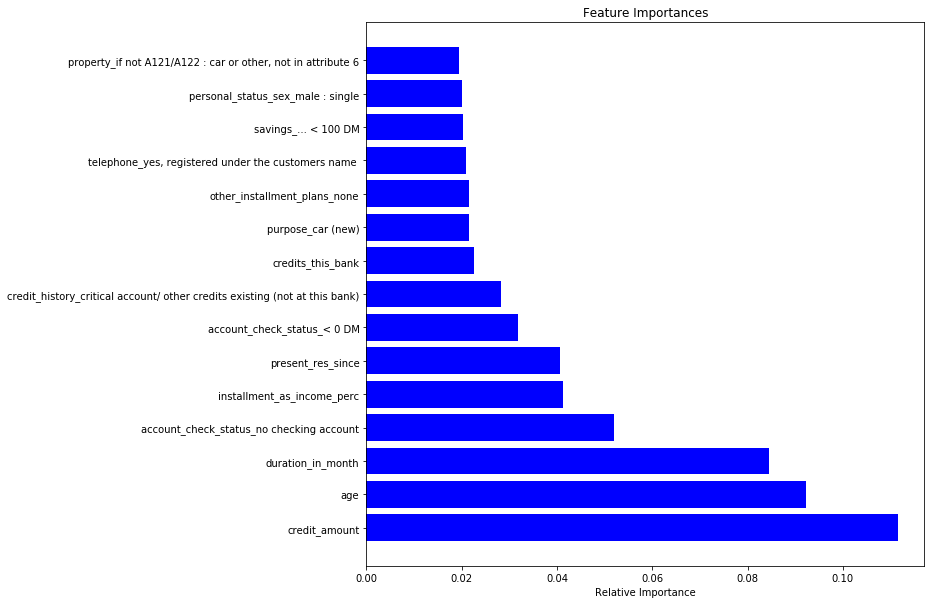

In [0]:
# View a list of the features and their importance scores
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:15]
a = dff.columns[:]
features= a.drop('default',1)
#plot it
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')
plt.show()

In [0]:
trainResult = rf.score(X_train, y_train)
testResult = rf.score(X_test, y_test)

In [0]:
"Train Accuracy:"
(trainResult*100.0)

Out[20]: 100.0

In [0]:
"Test Accuracy:"
(testResult*100.0)

Out[21]: 75.33333333333333

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfc = RandomForestClassifier(random_state=7)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train, y_train)

Out[61]: RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
 estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
 class_weight=None, criterion='gini',
 max_depth=None, max_features='auto',
 max_leaf_nodes=None, max_samples=None,
 min_impurity_decrease=0.0,
 min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0,
 n_estimators=100, n_jobs=None,
 oob_score=False, random_state=7,
 verbose=0, warm_start=False),
 min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
 verbose=0)

In [0]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 28

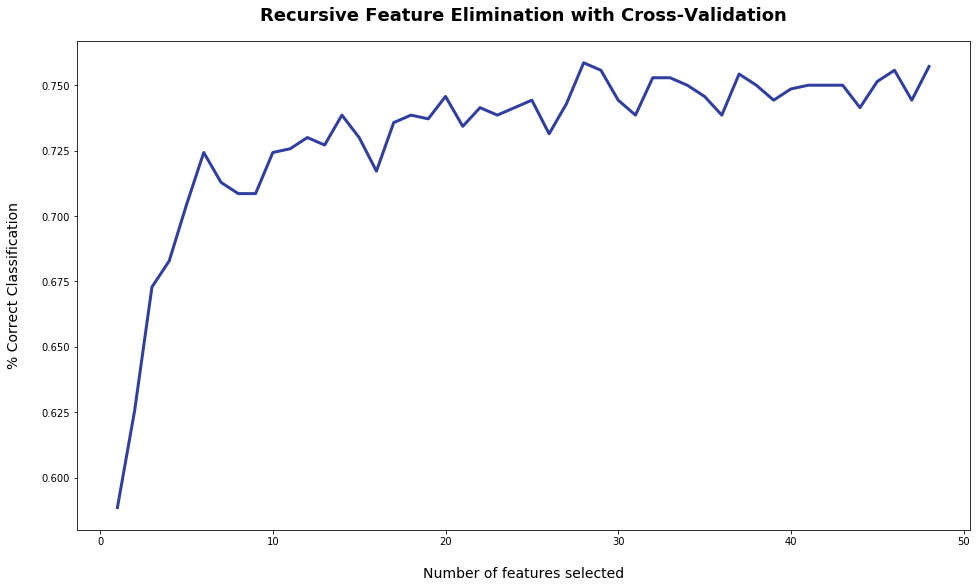

In [0]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [0]:
print(np.where(rfecv.support_ == False)[0])
X.columns[np.where(rfecv.support_ == False)[0]]
X_train.drop(X_train.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

[ 6 8 11 14 16 18 19 21 22 24 25 29 31 32 34 40 42 44 45 47]

In [0]:
rfecv.estimator_.feature_importances_

Out[65]: array([0.09967308, 0.13982961, 0.04690464, 0.04627943, 0.11397115,
 0.02445318, 0.03885923, 0.05809392, 0.03221494, 0.02098692,
 0.01643795, 0.02654401, 0.01950693, 0.01871027, 0.02679014,
 0.01693718, 0.01920637, 0.02361021, 0.01621993, 0.02207402,
 0.01538699, 0.01946616, 0.02230108, 0.01966342, 0.02491423,
 0.02226729, 0.02482753, 0.02387019])

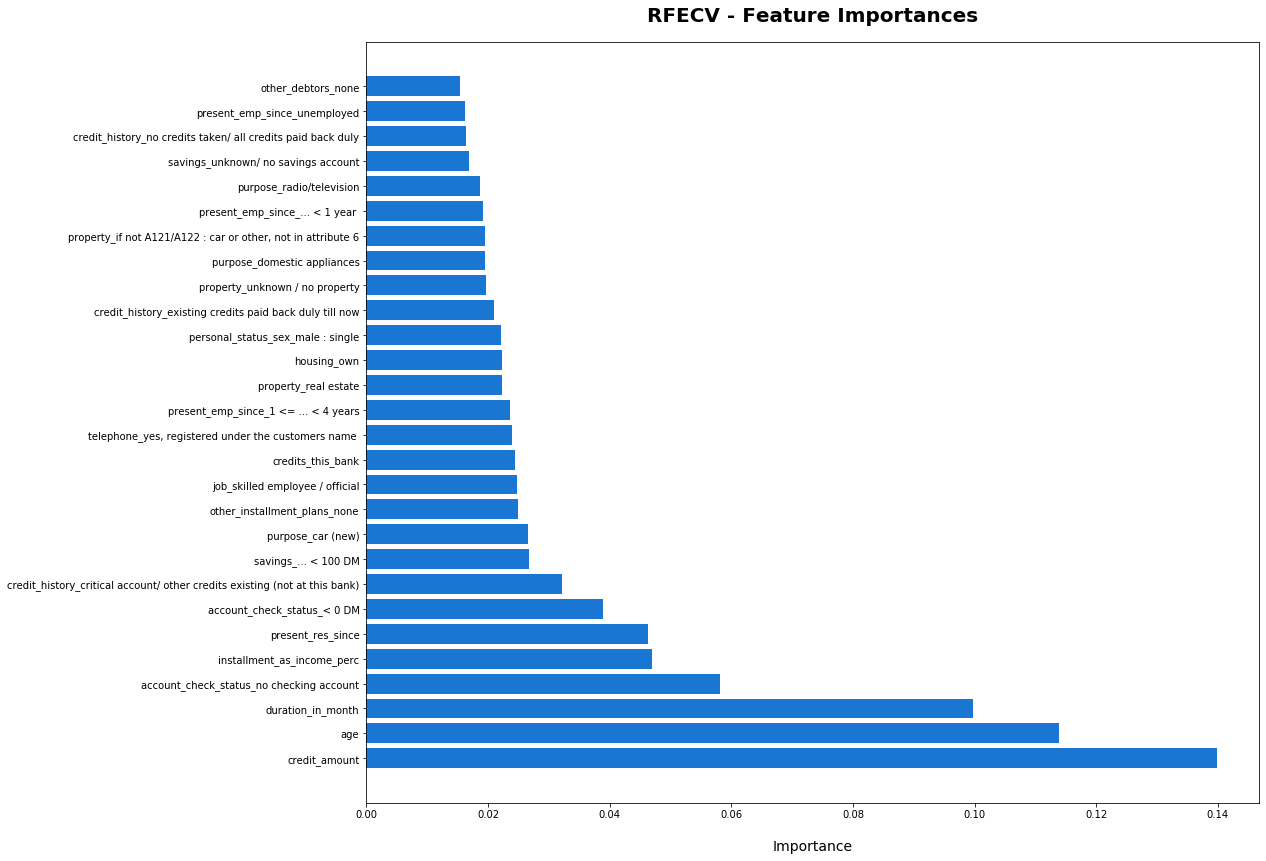

In [0]:
dset = pd.DataFrame()
dset['attr'] = X_train.columns
dset['importance'] = rfecv.estimator_.feature_importances_

dset = dset.sort_values(by='importance', ascending=False)


plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

# K-fold cross-validation

k-fold cross validation( without stratification)

Usually k is set as 10-20 in practical settings, depends on data set size

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
num_folds = 10
seed = 77

In [0]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
results = cross_val_score(rfm,X, y, cv=kfold)
results

Out[70]: array([0.87, 0.67, 0.79, 0.81, 0.81, 0.68, 0.75, 0.78, 0.75, 0.76])

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [0]:
num_folds = 10
seed = 77

In [0]:
kfold = KFold(n_splits=num_folds, random_state=seed)

In [0]:
results = cross_val_score(rfm,X, y, cv=kfold)
results

Out[29]: array([0.87, 0.67, 0.79, 0.81, 0.81, 0.68, 0.75, 0.78, 0.75, 0.76])

In [0]:
np.mean(abs(results))

Out[30]: 0.767

In [0]:
results.std()

Out[31]: 0.057105166141076934

Leave One Out Cross-Validation

In [0]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

In [0]:
# You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data
scores = cross_val_score(rfm, X_test, y_test, cv=LeaveOneOut())
scores

Out[72]: array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0.,
 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0.])

Because we have 350 samples, the leave one out cross-validation yields scores for 350 trials, and the score indicates either 
defaulter (1.0) or non-defaulter (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [0]:
scores.mean()

--------------------------------------------------------------------------- 
 KeyboardInterrupt Traceback (most recent call last)
 <command-383115783448525> in <module> 
 1 # You Will do it on X_train, y_train to save time. It will take too much time, hence not recommended for bigger data 
 ----> 2 scores = cross_val_score ( rfm , X_train , y_train , cv = LeaveOneOut ( ) ) 
 3 scores

 /databricks/python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py in cross_val_score (estimator, X, y, groups, scoring, cv, n_jobs, verbose, fit_params, pre_dispatch, error_score) 
 388 fit_params = fit_params , 
 389 pre_dispatch = pre_dispatch , 
 --> 390 error_score=error_score)
 391 return cv_results [ 'test_score' ] 
 392 

 /databricks/python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py in cross_validate (estimator, X, y, groups, scoring, cv, n_jobs, verbose, fit_params, pre_dispatch, return_train_score, return_estimator, error_score) 
 234 return_times = True , return_estimator = return_estimator , 
 235 error_score=error_score)
 --> 236 for train, test in cv.split(X, y, groups))
 237 
 238 zipped_scores = list ( zip ( * scores ) ) 

 /databricks/python/lib/python3.7/site-packages/joblib/parallel.py in __call__ (self, iterable) 
 1005 self . _iterating = self . _original_iterator is not None 
 1006 
 -> 1007 while self . dispatch_one_batch ( iterator ) : 
 1008 pass 
 1009 

 /databricks/python/lib/python3.7/site-packages/joblib/parallel.py in dispatch_one_batch (self, iterator) 
 833 return False 
 834 else : 
 --> 835 self . _dispatch ( tasks ) 
 836 return True 
 837 

 /databricks/python/lib/python3.7/site-packages/joblib/parallel.py in _dispatch (self, batch) 
 752 with self . _lock : 
 753 job_idx = len ( self . _jobs ) 
 --> 754 job = self . _backend . apply_async ( batch , callback = cb ) 
 755 # A job can complete so quickly than its callback is 
 756 # called before we get here, causing self._jobs to 

 /databricks/python/lib/python3.7/site-packages/joblib/_parallel_backends.py in apply_async (self, func, callback) 
 207 def apply_async ( self , func , callback = None ) : 
 208 """Schedule a func to be run""" 
 --> 209 result = ImmediateResult ( func ) 
 210 if callback : 
 211 callback ( result ) 

 /databricks/python/lib/python3.7/site-packages/joblib/_parallel_backends.py in __init__ (self, batch) 
 588 # Don't delay the application, to avoid keeping the input 
 589 # arguments in memory 
 --> 590 self . results = batch ( ) 
 591 
 592 def get ( self ) : 

 /databricks/python/lib/python3.7/site-packages/joblib/parallel.py in __call__ (self) 
 254 with parallel_backend ( self . _backend , n_jobs = self . _n_jobs ) : 
 255 return [func(*args, **kwargs)
 --> 256 for func, args, kwargs in self.items]
 257 
 258 def __len__ ( self ) : 

 /databricks/python/lib/python3.7/site-packages/joblib/parallel.py in <listcomp> (.0) 
 254 with parallel_backend ( self . _backend , n_jobs = self . _n_jobs ) : 
 255 return [func(*args, **kwargs)
 --> 256 for func, args, kwargs in self.items]
 257 
 258 def __len__ ( self ) : 

 /databricks/python/lib/python3.7/site-packages/sklearn/model_selection/_validation.py in _fit_and_score (estimator, X, y, scorer, train, test, verbose, parameters, fit_params, return_train_score, return_parameters, return_n_test_samples, return_times, return_estimator, error_score) 
 513 estimator . fit ( X_train , ** fit_params ) 
 514 else : 
 --> 515 estimator . fit ( X_train , y_train , ** fit_params ) 
 516 
 517 except Exception as e : 

 /databricks/python/lib/python3.7/site-packages/sklearn/ensemble/_forest.py in fit (self, X, y, sample_weight) 
 381 verbose = self . verbose , class_weight = self . class_weight , 
 382 n_samples_bootstrap=n_samples_bootstrap)
 --> 383 for i, t in enumerate(trees))
 384 
 385 # Collect newly grown trees 

 /databricks/python/lib/python3.7/site-packages/joblib/parallel.py in __call__ (self, iterable) 
 1015 
 1016 with self . _backend . retr

In [0]:
scores.std()

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 <command-383115783448528> in <module> 
 ----> 1 scores . std ( ) 

 NameError : name 'scores' is not defined

# Stratified cross-validation( Bonus)

k-fold cross validation with stratification

In [0]:
k = 10
from sklearn.model_selection  import StratifiedKFold, cross_val_score
stratified_kfold = StratifiedKFold(n_splits = k, random_state = 55)
results = cross_val_score(rfm, X, y, cv = stratified_kfold)

In [0]:
print('Accuracy Score')
print('Avearge: ', results.mean())
print('Standard deviation: ', results.std())

Accuracy Score
Avearge: 0.759
Standard deviation: 0.04085339643163101

# Bootstrapping ( Bonus)

Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data 
(with/without replacement)

Create a model with each bootstrap sample and validate it with the test set

Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

--------------------------------------------------------------------------- 
 ValueError Traceback (most recent call last)
 <command-383115783448536> in <module> 
 5 X_ , y_ = resample ( X_train , y_train ) 
 6 rfm . fit ( X_ , y_ ) 
 ----> 7 y_pred = rfm . predict ( X_test ) 
 8 
 9 acc = accuracy_score ( y_pred , y_test ) 

 /databricks/python/lib/python3.7/site-packages/sklearn/ensemble/_forest.py in predict (self, X) 
 610 The predicted classes . 
 611 """
 --> 612 proba = self . predict_proba ( X ) 
 613 
 614 if self . n_outputs_ == 1 : 

 /databricks/python/lib/python3.7/site-packages/sklearn/ensemble/_forest.py in predict_proba (self, X) 
 654 check_is_fitted ( self ) 
 655 # Check data 
 --> 656 X = self . _validate_X_predict ( X ) 
 657 
 658 # Assign chunk of trees to jobs 

 /databricks/python/lib/python3.7/site-packages/sklearn/ensemble/_forest.py in _validate_X_predict (self, X) 
 410 check_is_fitted ( self ) 
 411 
 --> 412 return self . estimators_ [ 0 ] . _validate_X_predict ( X , check_input = True ) 
 413 
 414 @ property

 /databricks/python/lib/python3.7/site-packages/sklearn/tree/_classes.py in _validate_X_predict (self, X, check_input) 
 389 "match the input. Model n_features is %s and " 
 390 "input n_features is %s " 
 --> 391 % (self.n_features_, n_features))
 392 
 393 return X

 ValueError : Number of features of the model must match the input. Model n_features is 28 and input n_features is 48

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge: 0.7336666666666666
Standard deviation: 0.010999999999999985

Inference:

Here crossfold validation with stratification gives better result than Bootstrapping.